In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sym
from sympy import oo
sym.init_printing()
# X = sym.laplace_transform(x, t, s)

def pole_zero_plot(poles, zeros, ax=None):
    mR = -2 #  valor inicial para minimo real
    MR = 2  #  valor inicial para maximo real
    mI = -2 #  valor inicial para minimo imaginario
    MI = 2  #  valor inicial para maximo imaginario
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
        if complex(pole).real < mR:
            mR = complex(pole).real
        if complex(pole).real > MR:
            MR = complex(pole).real
        if complex(pole).imag < mI:
            mI = complex(pole).imag
        if complex(pole).imag > MI:
            MI = complex(pole).imag
            
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
        if complex(zero).real < mR:
            mR = complex(zero).real
        if complex(zero).real > MR:
            MR = complex(zero).real
        if complex(zero).imag < mI:
            mI = complex(zero).imag
        if complex(zero).imag > MI:
            MI = complex(zero).imag

            
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.axis([mR*1.1, MR*1.1, mI*1.1, MI*1.1])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()


## Definición

La [transformada de Laplace](https://es.wikipedia.org/wiki/Transformada_de_Laplace) está definida por

\begin{equation}
X(s) = \int_{-\infty}^{\infty} x(t) \, e^{-s t} \; dt
\end{equation}

En la mayoría de aplicaciones en ingeniería, las señales se definene para $t>0$, lo que permite expresar la transformada como:

\begin{equation}
X(s) = \int_{0}^{\infty} x(t) \, e^{-s t} \; dt
\end{equation}

donde $X(s) = \mathcal{L} \{ x(t) \}$ se usa como notación de la Transformada de Laplace de la señal $x(t)$. 


La transformada inversa de Laplace es:

\begin{equation}
x(t) = \frac{1}{2 \pi j} \int_{\sigma - j \infty}^{\sigma + j \infty} X(s) \, e^{s t} \; ds
\end{equation}


La variable $s = \sigma + j \omega$ es compleja, de manera que en el kernel de transformación $e^{-s t}$ aparezcan los comportamientos:

- oscilatorios con $e^{-j \omega t}$
- exponenciales crecientes o decreientes con $e^{\sigma t}$
- constantes con $e^{0 t}$
- combinaciones de los anteriores.

Lo anterior permite analizar sistemas LTI con la transformada de Laplace.

El conjunto de valores de $s$ que hacen que la integral de transformación converja se llama Región de convergencia (ROC).


Puede interpretarse como el "parecido" entre la señal $x(t)$ y  $e^{\sigma} \cdot cos(\omega t)$.





### Transformada del delta de Dirac

\begin{equation}
\mathcal{L} \{ \delta(t) \} = \int_{-\infty}^{\infty} \delta(t) \, e^{- s t} dt = e^{- s t} \Big\vert_{t=0}  =  1
\end{equation}
para $s \in \mathbb{C}$. La ROC corresponde a todo el plano $S$.

Como $\mathcal{L} \{ \delta(t) \} = 1$, todas las frecuencias están presentes en la señal con igual peso.

In [2]:
t = sym.symbols('t', real=True)
s = sym.symbols('s', complex=True)

X = sym.integrate(sym.DiracDelta(t)*sym.exp(-s*t), (t, -sym.oo, sym.oo))
X

### Transformada de una Exponencial Compleja y causal

La transformada $X(s) = \mathcal{L} \{ x(t) \}$ de una señal exponencial compleja y causal

\begin{equation}
x(t) = \epsilon(t) \cdot e^{-s_0 t}
\end{equation}

con frecuencia compleja $s_0 \in \mathbb{C}$ se obtiene de la expresión integral de la transfomada de Laplace

\begin{equation}
\begin{split}
X(s) &= \int_{0}^{\infty} e^{-s_0 t} \cdot e^{-s t} \; dt \\
&= \int_{0}^{\infty} e^{-(s_0+s) t} \; dt \\
&= \frac{-e^{-(s+s_0)t}}{s+s_0} \, \bigg\vert_{0}^{\infty} \\
&= \frac{-1}{s+s_0} \left[ \lim_{t \to \infty} \left( e^{- (s+s_0) t} \right) -1 \right] \\
&= \frac{1}{s + s_0}
\end{split}
\end{equation}

Observe que el límite anterior converge solo si $e^{- (s+s_0) t}$ converge, es decir que $\Re \{ s + s_0 \} > 0$. Por lo cual la ROC es:

\begin{equation}
\Re \{ s \} > \Re \{ - s_0 \} 
\end{equation}

Entonces, la transformada de la señal exponencial compleja y causal es
\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot e^{-s_0 t} \} = \frac{1}{s + s_0} \qquad \forall s : \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

In [3]:
t = sym.symbols('t', real=True)
s = sym.symbols('s', complex=True)

s0 = 1j
x = sym.exp(-s0*t)*sym.Heaviside(t)
X, a, cond = sym.laplace_transform(x, t, s)
X, a, cond

⎛ 1.0          ⎞
⎜─────, 0, True⎟
⎝s + ⅈ         ⎠

In [4]:
help(sym.laplace_transform)

Help on function laplace_transform in module sympy.integrals.transforms:

laplace_transform(f, t, s, **hints)
    Compute the Laplace Transform `F(s)` of `f(t)`,
    
    .. math :: F(s) = \int_0^\infty e^{-st} f(t) \mathrm{d}t.
    
    For all "sensible" functions, this converges absolutely in a
    half plane  `a < \operatorname{Re}(s)`.
    
    This function returns ``(F, a, cond)``
    where ``F`` is the Laplace transform of ``f``, `\operatorname{Re}(s) > a` is the half-plane
    of convergence, and ``cond`` are auxiliary convergence conditions.
    
    If the integral cannot be computed in closed form, this function returns
    an unevaluated :class:`LaplaceTransform` object.
    
    For a description of possible hints, refer to the docstring of
    :func:`sympy.integrals.transforms.IntegralTransform.doit`. If ``noconds=True``,
    only `F` will be returned (i.e. not ``cond``, and also not the plane ``a``).
    
    >>> from sympy.integrals import laplace_transform
    >>> fro

In [5]:
X

SymPy devuelve tres resutados:

- Primero la transformada de Laplace $X(s)$
- Segundo un valor $a$ que indica qué parte del semiplano $\Re \{ s \} > 0$ tiene convergencia en que $\Re \{ s \} > a$ 
- Tercero otras condiciones de convergencia.

Inicialmente se analizará solamente la transformada.

Tenga en cuenta que $s$ es una variable compleja, de modo que el "espectro" no puede representarse como una curva.

1.0/(I*omega + sigma + I)


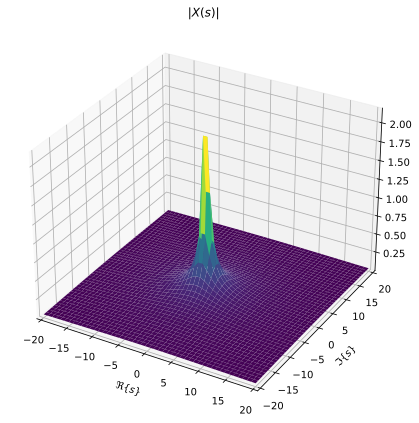

In [6]:
sigma, omega = sym.symbols('sigma omega')

X1 = X.subs({s: sigma+sym.I*omega})
print(X1)

plt.rcParams['figure.figsize'] = 6,6
sym.plotting.plot3d(abs(X1),
                    (sigma, -20, 20),
                    (omega, -20, 20),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

Los diagramas de polos y ceros son versiones simplificadas de la gráfica anterior.

In [7]:
sym.numer(X) # El numerador de X(s)

In [8]:
sym.roots(sym.numer(X), s) # Las raíces del numerador de X(s)

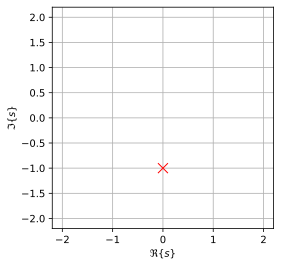

In [9]:
plt.rcParams['figure.figsize'] = 4,4
pole_zero_plot(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

## Propiedades

Dadas las propiedades presentadas para la transformada de Fourier y la estructura de las transformadas de Laplace y de Fourier, se obtienen las mismas propiedades.

### Invertible
\begin{equation}
x(t) = \mathcal{L}^{-1} \left\{ \mathcal{L} \{ x(t) \} \right\}
\end{equation}


### Linealidad

\begin{equation}
\mathcal{L} \{ A \cdot x_1(t) + B \cdot x_2(t) \} = A \cdot X_1(S) + B \cdot X_2(S)
\end{equation}


**Ejemplo - Transformada de Laplace de una señal senoidal causal**


\begin{equation}
x(t) = sin( \omega _0 t) \cdot \epsilon(t)
\end{equation}

con $\omega _0 \in \mathbb{R}^+$

De acuerdo con las expresiones de Euler:
\begin{align}
\cos(\omega_0 t) &= \frac{1}{2} \left( e^{j \omega_0 t} + e^{-j \omega_0 t} \right) \\
\sin(\omega_0 t) &= \frac{1}{2j} \left( e^{j \omega_0 t} - e^{-j \omega_0 t} \right)
\end{align}

Así, la transformada de $sin( \omega _0 t)$ debe ser igual a la de $\frac{1}{2j} ( e^{j \omega_0 t} - e^{-j \omega_0 t})$.

Dado que la transformada de Laplace de una exponencial compleja decreciente y causal es :

\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot e^{-s_0 t} \} = \frac{1}{s + s_0}
\end{equation}

Entonces:
\begin{equation}
\mathcal{L} \{ sin( \omega _0 t) \} = \frac{1}{2j} \left( \frac{1}{s - j \omega_0} - \frac{1}{s + j \omega_0} \right) = \frac{\omega_0}{s^2 + \omega_0^2}
\end{equation}


Aplicando el mismo razonamiento puede encontrarse la transformada del coseno.

In [10]:
t = sym.symbols('t', real=True)
s = sym.symbols('s', complex=True)

w0 = 5
x = sym.sin(w0* t)*sym.Heaviside(t)
x

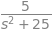

In [11]:
X, a, cond = sym.laplace_transform(x, t, s)
X

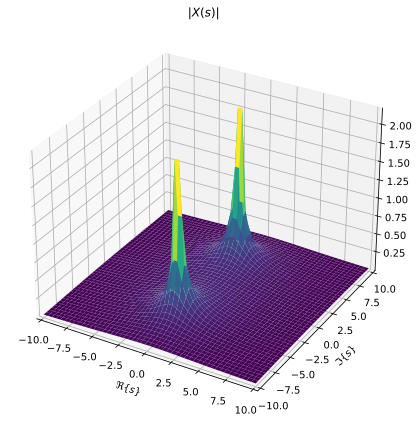

In [12]:
sigma, omega = sym.symbols('sigma omega')

X1 = X.subs({s: sigma+sym.I*omega})

plt.rcParams['figure.figsize'] = 6,6
sym.plotting.plot3d(abs(X1),
                    (sigma, -10, 10),
                    (omega, -10, 10),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

\begin{equation}
s^2+25=0
\end{equation}
\begin{equation}
s^2=-25
\end{equation}

\begin{equation}
s = +- j 5
\end{equation}


In [13]:
sym.denom(X)

In [14]:
sym.roots(sym.denom(X), s)

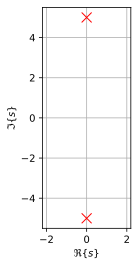

In [15]:
plt.rcParams['figure.figsize'] = 4,4

pole_zero_plot(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

**Ejercicio**

Encuentre la transformada de Laplace de la señal $cos(\omega_0 t)  \cdot \epsilon(t)$

Desarrolle su análisis aquí

In [16]:
# Escriba su código

### Lista de propiedades

A continuación se listan propiedades y teoremas:

| &#65279;  | $x(t)$ | $X(s) = \mathcal{L} \{ x(t) \}$ | Región de convergencia ROC |
|:---|:---:|:---:|:---:|
| Linealidad | $A \, x_1(t) + B \, x_2(t)$ | $A \, X_1(s) + B \, X_2(s)$ | $\supseteq ROC\{x_1\} \cap ROC\{x_2\}$ |
| Señales reales | $x(t) = x^*(t)$ | $X(s) = X^*(s^*)$ | | 
| Escalamiento | $x(a t)$ | $\frac{1}{\lvert a \rvert} X\left( \frac{s}{a} \right)$ | $s: \frac{s}{a} \in \text{ROC}\{x(t)\}$ |
| Convolución | $x(t) * h(t)$ | $X(s) \cdot H(s)$ | $\supseteq \text{ROC}\{x(t)\} \cap \text{ROC}\{h(t)\}$ |
| Desplazamiento | $x(t - \tau)$ | $e^{-s \tau} \cdot X(s)$ | $\text{ROC}\{x(t)\}$ |
| Modulación | $e^{s_0 t}\cdot x(t)$ | $X(s - s_0)$ | $s: s - \Re \{s_0\} \in \text{ROC}\{x(t)\}$ |
| Diferenciación | $\frac{d}{dt} x(t)$ | $s \cdot X(s) - x(0+)$ | $\supseteq \text{ROC}\{x(t)\}$ |
| Integración | $\int_{-\infty}^{t} x(t) \; dt$ | $\frac{1}{s} \cdot X(s)$ | $\supseteq \text{ROC}\{x(t)\} \cap \{s: \Re \{s\} > 0 \}$ |

donde $A, B, s_0 \in \mathbb{C}$, $a \in \mathbb{R} \setminus \{0\}$ y $\tau \in \mathbb{R}$.

## Algunas transformadas de Laplace

A continuación se listan las transformadas de Laplace de funciones usadas a menudo:

| $x(t)$                             | $X(s) = \mathcal{L} \{ x(t) \}$ | Región de Convergencia ROC |
|:----------------------------------:|:-------------------------------:|:--------------------------:|
| $\delta(t)$                        | $1$                             | $\mathbb{C}$               |
| $\epsilon(t)$                      | $\frac{1}{s}$                   | $\Re \{s\} > 0$            |
| $t \epsilon(t)$                    | $\frac{1}{s^2}$                 | $\Re \{s\} > 0$            |
| $e^{- s_0 t} \epsilon(t)$          | $\frac{1}{s + s_0}$             | $\Re \{s\} > \text{Re}\{-s_0\}$ |
| $\sin(\omega_0 t) \epsilon(t)$     | $\frac{\omega_0}{s^2 + \omega_0^2}$ | $\Re \{s\} > 0$        |
| $\cos(\omega_0 t) \epsilon(t)$     | $\frac{s}{s^2 + \omega_0^2}$    | $\Re \{s\} > 0$            |
| $t^n e^{-s_0 t} \epsilon(t)$       | $\frac{n!}{(s+s_0)^{n+1}}$      | $\Re \{s\} > \text{Re}\{-s_0\}$ |
| $e^{-s_0 t} \cos(\omega_0 t) \epsilon(t)$ | $\frac{s + s_0}{(s+s_0)^2 + \omega_0^2}$ | $\Re \{s\} > \Re \{-s_0\}$ |
| $e^{-s_0 t} \sin(\omega_0 t) \epsilon(t)$ | $\frac{\omega_0}{(s+s_0)^2 + \omega_0^2}$ | $\Re \{s\} > \Re \{-s_0\}$ |
| $t \cos(\omega_0 t) \epsilon(t)$ | $\frac{s^2 - \omega_0^2}{(s^2 + \omega_0^2)^2}$ | $\Re \{s\} > 0$ |
| $t \sin(\omega_0 t) \epsilon(t)$ | $\frac{2 \omega_0 s}{(s^2 + \omega_0^2)^2}$ | $\Re \{s\} > 0$ |




Donde $s_0 \in \mathbb{C}$, $\omega_0 \in \mathbb{R}$ and $n \in \mathbb{N}$. Otras transformadas se pueden encontrar [en línea](https://en.wikipedia.org/wiki/List_of_Laplace_transforms).

##  Circuitos
### Impedancias complejas y equivalencias


Los circuitos eléctricos pueden analizarse en el dominio transformado de Laplace enfocándose primero en el comportamiento de cada elemento. La siguiente tabla resume el comportamiento de los elementos pasivos de los circuitos eléctricos el el dominio del tiempo (Ecuación diferencial) y de la frecuencia (Laplace). La impedancia compleja se muestra en la última columna.


| Elemento | Dominio del tiempo  (EDO)| Dominio de la frecuencias con Laplace | $Z(s) = \frac{U(s)}{I(s)}$ |
|:---:|:---:|:---:|:---:|
| ![Resistancia](resistor.png) | $u(t) = R \cdot i(t)$ | $U(s) = R \cdot I(s)$ | $R$ |
| ![Inductor](inductor.png) | $\begin{matrix} u(t) = L \frac{d}{dt} i(t) \\ i(t) = \frac{1}{L} \int_{0}^{t} u(\tau) d\tau + i(0+) \epsilon(t) \end{matrix}$ | $\begin{matrix} U(s) = s L I(s) - L i(0+) \\ I(s) = \frac{1}{s L} U(s) + \frac{1}{s} i(0+) \end{matrix}$ | $s L$ |
| ![Capacitor](capacitor.png) | $\begin{matrix} u(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau + u(0+) \epsilon(t) \\ i(t) = C \frac{d}{dt} u(t) \end{matrix}$ | $\begin{matrix} U(s) = \frac{1}{s C} I(s) + \frac{1}{s} u(0+) \\ I(s) = s C U(s) - C u(0+) \end{matrix}$ | $\frac{1}{s C}$

Considere el siguiente circuito suponiendo valores iniciales iguales a cero.

![Circuit of a 2nd-order analog low-pass filter](figlowpass.png)

Para ilustrar, considere que $L = 0.5$, $R = 1$, $C = 0.4$ .


\begin{equation}
v_L(t) + v_R(t) + v_C(t) = x(t)
\end{equation}

\begin{equation}
L \frac{di}{dt} + R i(t) + \frac{1}{C} \int_{0}^{t} i(\tau) d\tau = x(t)
\end{equation}

La salida es el voltaje del capacitor

\begin{equation}
y(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau
\end{equation}

De donde se obtiene la corriente

\begin{equation}
C \frac{dy}{dt} = i(t)
\end{equation}

Incorporando la salida en la ecuación de la malla se obtiene

\begin{equation}
C L \frac{d^2 y(t)}{dt^2} + C R \frac{d y(t)}{dt} + y(t) = x(t)
\end{equation}

La ecuación anterior puede transformarse al dominio de Laplace.
\begin{equation}
C L s^2Y(s)  + C R sY(s) + Y(s) = X(s)
\end{equation}


Puede encontrarse una expresión para la salida en el dominio de Laplace como

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot X(s)
\end{equation}


Observe que el circuito puede transformarse al dominio de Laplace directamente.

![Equivalent network in the Laplace domain](figuras/lowpass_laplace_domain.png)



**Nota** Las mismas aproximaciones pueden realizarse en otros campos de conocimiento en donde se modelen fenómenos con Ecuaciones Diferenciales.



\begin{equation}
Y(s) = X(s) \frac{\frac{1}{sC}}{R + sL + \frac{1}{sC}}
\end{equation}


\begin{equation}
Y(s) = X(s) \frac{\frac{sC}{sC}}{RCs + sLCs + \frac{sC}{sC}}
\end{equation}

\begin{equation}
Y(s) = X(s) \frac{1}{RCs + LCs^2 + 1}
\end{equation}

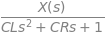

In [17]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', real=True)
X = sym.Function('X')(s)

F = 1/(L*C*s**2 + R*C*s + 1)
Y = F * X
Y

Introduzca los valores de los elementos del circuito en un diccionario para usarlo después.

In [18]:
RLC = {R: 1,
       L: 0.5,
       C: .4}
RLC

### Respuesta al escalón

La respuesta al escalón en el dominio de Laplace se obtiene al considerar que $X(s) = \frac{1}{s}$

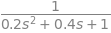

In [19]:
F = F.subs(RLC)
F

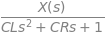

In [20]:
Y

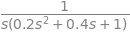

In [30]:

Y_escalon = Y.subs(RLC).subs(X, 1/s)
Y_escalon

La respuesta al escalón en el dominio del tiempo se obtiene al considerar operar la respuesta en el doninio de la frecuencia con la Transformada inversa de Laplace.

In [31]:
y_escalon = sym.inverse_laplace_transform(Y_escalon,s,t)
y_escalon

Ahora puede graficarse la señal de salida en el dominio del tiempo y el mapa de polos y ceros asociado a dicha señal.

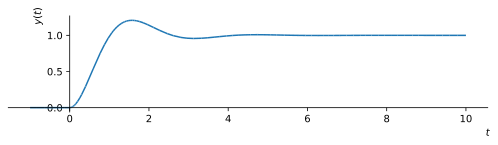

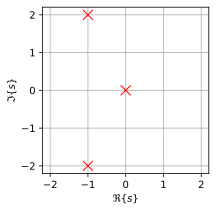

In [32]:
plt.rcParams['figure.figsize'] = 7, 2
sym.plot(y_escalon, (t, -1, 10), xlabel='$t$', ylabel='$y(t)$');
plt.rcParams['figure.figsize'] = 3, 3
pole_zero_plot(sym.roots(sym.denom(Y_escalon), s), sym.roots(sym.numer(Y_escalon), s))

La ubicación de las raíces en el plano $s$ determinan la forma de las señales y pueden asociarse con propiedades de las señales o sistemas que modelan.

![formas señales](laplace_senales.gif)